In [3]:
## Lab | Inferential statistics - ANOVA

## Note: The following lab is divided in 2 sections which represent activities 3 and 4.

## Part 1
    ## In this activity, we will look at another example. Your task is to understand the problem and write down all the steps to set up ANOVA. After the next lesson, we will ask you to solve this problem using Python. Here are the steps that you would need to work on: - Null hypothesis - Alternate hypothesis - Level of significance - Test statistic - P-value - F table
    ## Context
    ##  Suppose you are working as an analyst in a microprocessor chip manufacturing plant. You have been given the task of analyzing a plasma etching process with respect to changing Power (in Watts) of the plasma beam. Data was collected and provided to you to conduct statistical analysis and check if changing the power of the plasma beam has any effect on the etching rate by the machine. You will conduct ANOVA and check if there is any difference in the mean etching rate for different levels of power. You can find the data anova_lab_data.xlsx file in the files_for_lab folder
        ## State the null hypothesis
        ## State the alternate hypothesis
        ## What is the significance level
        ## What are the degrees of freedom of model, error terms, and total DoF
    ## Data was collected randomly and provided to you in the table as shown: link to the image - Data

## Part 2
    ## In this section, use Python to conduct ANOVA.
    ## What conclusions can you draw from the experiment and why?

In [4]:
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
file_path = r"C:\Users\rainm\Documents\Rodrigo\Code bootcamp\Ironhack\Material\Labs\doing the LABs - by Rodrigo Pereira\anova_lab_data.xlsx"
df = pd.read_excel(file_path)

# Stripping any leading/trailing spaces in column names
df.columns = df.columns.str.strip()

# Extracting etching rates based on power levels
etching_rate_160W = df[df['Power'] == '160 W']['Etching Rate'].values
etching_rate_180W = df[df['Power'] == '180 W']['Etching Rate'].values
etching_rate_200W = df[df['Power'] == '200 W']['Etching Rate'].values

# Creating a new dataframe for ANOVA
df_reshaped = pd.DataFrame({
    '160 W': etching_rate_160W,
    '180 W': etching_rate_180W,
    '200 W': etching_rate_200W
})

# Display the data
df_reshaped

,160 W,180 W,200 W
0,5.43,6.24,8.79
1,5.71,6.71,9.20
2,6.22,5.98,7.90
3,6.01,5.66,8.15
4,5.59,6.60,7.55


In [6]:
anova_result = stats.f_oneway(df_reshaped['160 W'], df_reshaped['180 W'], df_reshaped['200 W'])

# Degrees of Freedom
dof_model = 2
dof_error = df_reshaped.size - df_reshaped.columns.size
dof_total = dof_model + dof_error

# F-statistic and p-value
F_statistic = anova_result.statistic
p_value = anova_result.pvalue

print('ANOVA F-statistic:', F_statistic)
print('ANOVA p-value:', p_value)
print('ANOVA dof_model:', dof_model)
print('ANOVA dof_error:', dof_error)
print('ANOVA dof_total:', dof_total)

ANOVA F-statistic: 36.87895470100505
ANOVA p-value: 7.506584272358903e-06
ANOVA dof_model: 2
ANOVA dof_error: 12
ANOVA dof_total: 14


C:\Users\rainm\AppData\Local\Temp\ipykernel_20156\2305179781.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Power', y='Etching Rate', data=df_melt, palette='Blues_r')


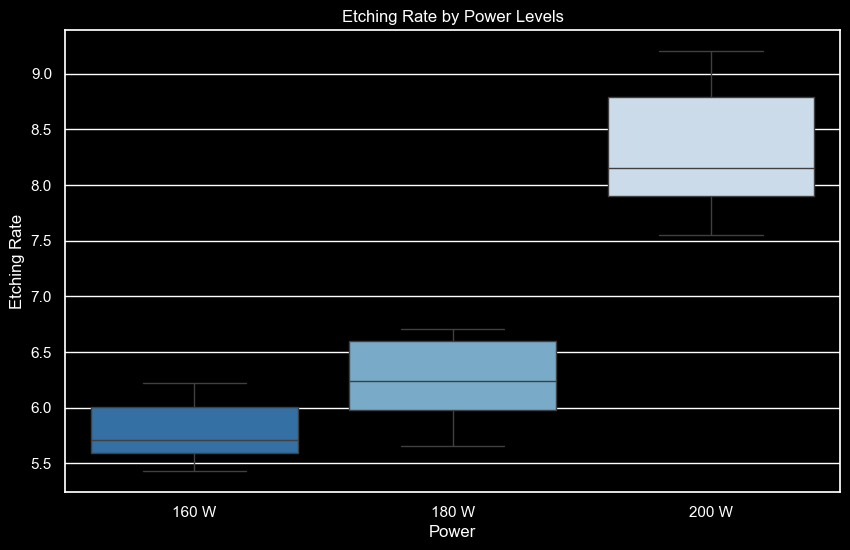

In [7]:
# Dark theme for plots
sns.set(style='darkgrid')
plt.style.use('dark_background')

# Reshaping the dataframe for visualization
df_melt = df_reshaped.melt(var_name='Power', value_name='Etching Rate')

plt.figure(figsize=(10, 6))
sns.boxplot(x='Power', y='Etching Rate', data=df_melt, palette='Blues_r')
plt.title('Etching Rate by Power Levels')
plt.show()